# Data Preparation

### now we have stored our data in the csv file

# => topsong.csv

In [15]:
# now we import some necessary module 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import getcwd
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from pandas.plotting import scatter_matrix
pd.plotting.register_matplotlib_converters()
%matplotlib inline

#  here we will see how to access the data

In [ ]:
path="C:\Users\91971\Downloads\topsong.csv"

# Data Engineering

## .get the data

In [12]:
''' read the data from topsong.csv file'''
# we use head for show the top 5  rows or values
df=pd.read_csv(r'C:\Users\91971\Downloads\topsong.csv')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [13]:
# the tail function is uses to show the last 5 values 
df.tail()


,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
45,46,One Thing Right,Marshmello,brostep,88,62,66,-2,58,44,182,7,5,88
46,47,Te Robar�,Nicky Jam,latin,176,75,67,-4,8,80,202,24,6,88
47,48,Happier,Marshmello,brostep,100,79,69,-3,17,67,214,19,5,88
48,49,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
49,50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


In [ ]:
df.columns # we use this to show the number of columns

In [ ]:
# List of features of a song
feature_list = ['BPM', 'Energy', 'Danceability', 'Loudness(dB)', 'Liveness',
                 'Valence', 'Length', 'Acousticness', 'Speechiness']



In [ ]:
# here we are renaming the columns names
df.rename(columns={'Track.Name':'track_name',
                   'Artist.Name':'artist_name',
                   'Beats.Per.Minute':'BPM',
                   'Loudness..dB..':'Loudness(dB)',
                   'Valence.':'Valence','Length.':'Length', 
                   'Acousticness..':'Acousticness',
                   'Speechiness.':'Speechiness'},inplace=True)

In [ ]:
# so here we just droping the unneeded columns
df.drop(['track_name','Unnamed: 0','artist_name','Genre'],axis=1,inplace=True)
df.columns

# just ploting the lines

In [16]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Se�orita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [18]:
import seaborn as sns

Text(0.5, 1.0, 'so this is graph')

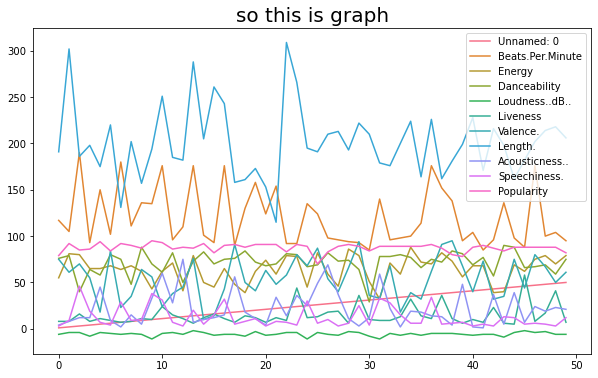

In [24]:
# here we are trying to draw a graph 
plt.figure(figsize=(10,6))
sns.lineplot(data=df,dashes=False)
plt.title("so this is graph", size=20)

In [ ]:

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, linewidths=.6, fmt= '.1f',ax=ax)

interactive(children=(Dropdown(description='Feature', options=('BPM', 'Energy', 'Danceability', 'Loudness(dB)'…

<function __main__.choose_features(Feature)>

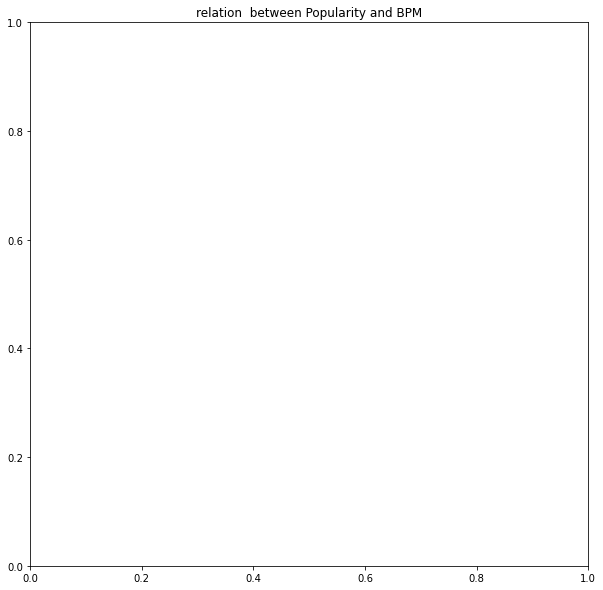

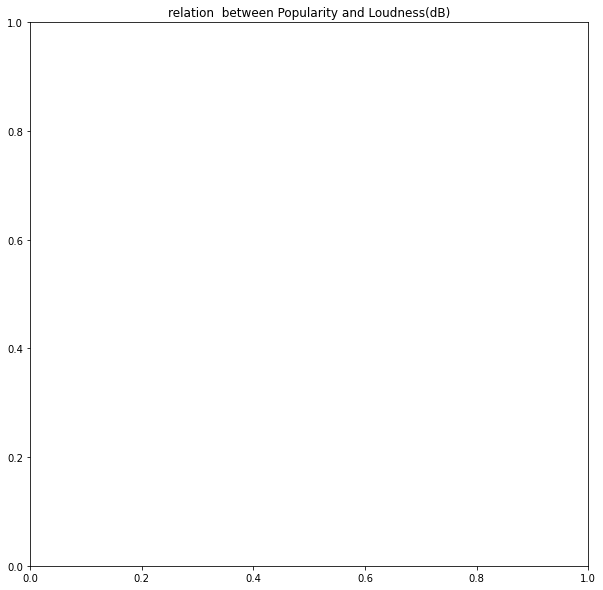

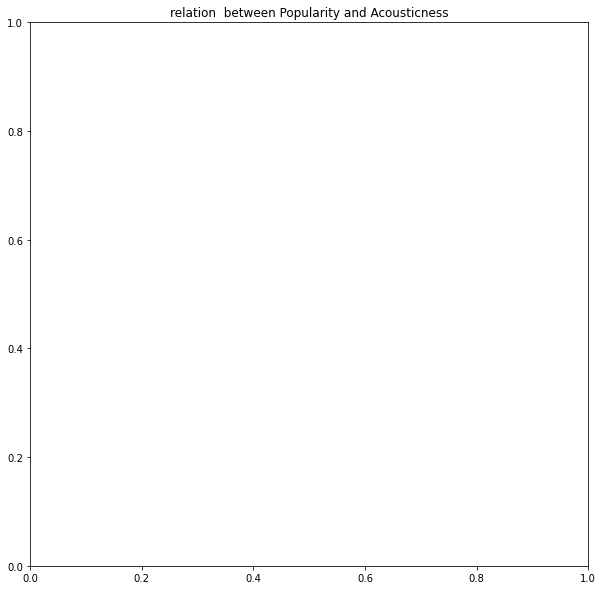

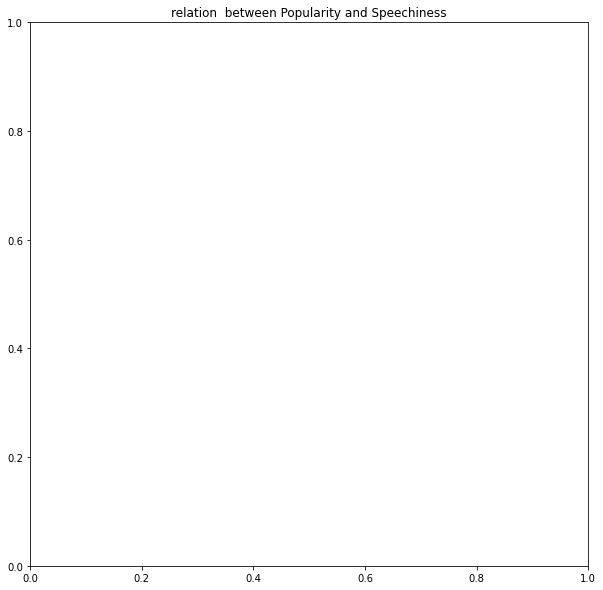

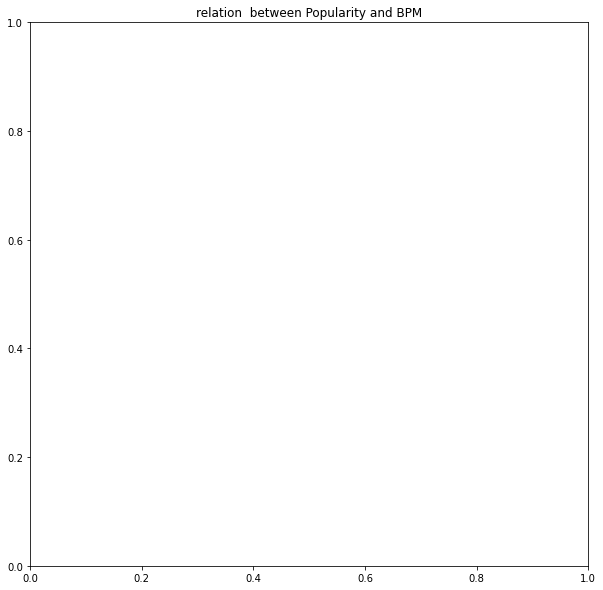

In [25]:
# draw a plotted graph between popularity and the chosen feature 
def make_plot_graph(feature):
    figure = plt.subplots(figsize=(10,10))
    plt.title('relation  between Popularity and {}'.format(feature))
    sns.regplot(x=feature, y ='Popularity',
                ci=None, data=df)
    sns.kdeplot(df[feature], df.Popularity)

# Return a plotted graph between popularity and the param
def choose_features(Feature):
    return make_plot_graph(Feature)
# Display a drop down with a list of features
interact(choose_features, Feature = feature_list)


#  the mean value of the features

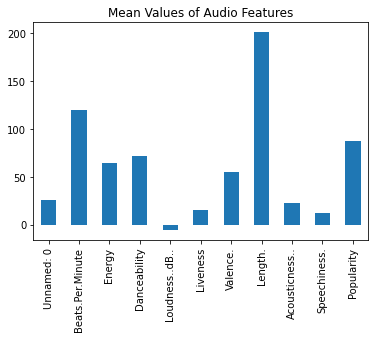

In [34]:

df.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()


# now we will see the pupularity on which basis according to provided data into   the topsong.csv file format

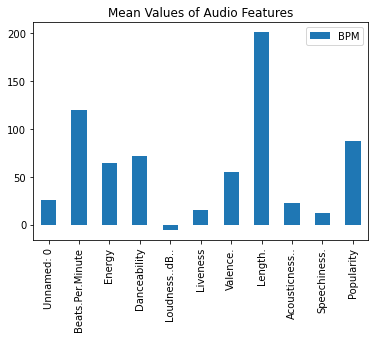

In [48]:
df.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.legend(feature_list)                    # is is used to show the max value in the grapp
plt.show()
